In [11]:
#Importacion de las librerias
import numpy as np
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [46]:
import matplotlib as plt
import seaborn as sns

In [23]:
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive")

/content/gdrive


In [30]:
#Importacion del conjunto de datos
dataset = pd.read_csv("pistachio.csv")
dataset.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [27]:
#Revision de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [28]:
dataset.shape

(1718, 17)

Se observa que en la base de datos no hay datos nulos. Para realizar el modelo vamos a normalizar la variable Class

In [34]:
dataset.Class.value_counts()

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64

In [35]:
dataset.Class = dataset.Class.map({'Kirmizi_Pistachio': 0,'Siit_Pistachio': 1})

In [36]:
dataset.Class.value_counts()

0    998
1    720
Name: Class, dtype: int64

Con el dataset organizado, podemos proceder a realizar los modelos.

# Modelos de clasificacion

A continuacion vamos a realizar tres modelos diferentes de segmentacion, usando la variale 'Clase' como la variable de clasificacion, pero primero esta variable se va a estandarizar  

In [52]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

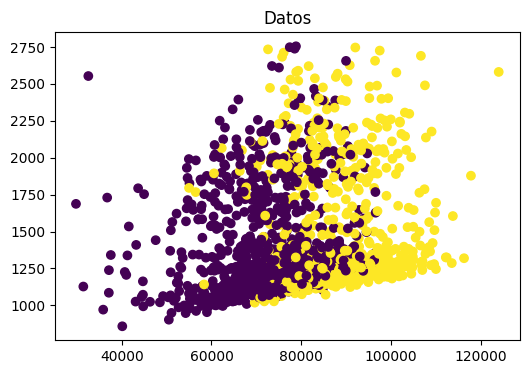

In [53]:
#Visualizacion!
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(dataset.AREA, dataset.PERIMETER, c=dataset.Class);
ax.set_title("Datos");

# Primer modelo, SVM

In [54]:
# División de los datos en train y test
X = dataset.drop(columns = 'Class') # Matriz de 16 columnas -Variable Independientes
y = dataset['Class'] # Vector de 200 filas y 1 columa- Variable Dependiente

In [ ]:
 y.values.reshape(-1,1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

In [62]:
# Creación del modelo SVM
modelo = SVC(C=0.1,kernel='sigmoid',random_state=42, verbose= True)
modelo.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, kernel='sigmoid', random_state=42, verbose=True)

In [70]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [65]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.5744186046511628


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_test_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       247
           1       0.00      0.00      0.00       183

    accuracy                           0.57       430
   macro avg       0.29      0.50      0.36       430
weighted avg       0.33      0.57      0.42       430



# Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [68]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.90       247
           1       0.90      0.82      0.86       183

    accuracy                           0.89       430
   macro avg       0.89      0.88      0.88       430
weighted avg       0.89      0.89      0.89       430

